In [1]:
# from animaldataset.dataset import get_data_loaders
import torch
from torchvision import models
from PIL import Image
from matplotlib.pyplot import imshow
from torchvision import models, transforms

/home/mvv/anaconda3/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import matplotlib.pyplot as plt

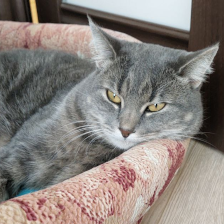

In [3]:
image = Image.open("cat.png")
image = image.convert()
(image)

In [4]:
input = transforms.PILToTensor()(image)
input = input.to(dtype=torch.float)

In [5]:
from torchcam.methods import LayerCAM
from torchcam.utils import overlay_mask
from torchvision.transforms.functional import normalize, resize, to_pil_image

In [24]:
model = models.resnet34(weights=models.ResNet34_Weights.DEFAULT)
# model.fc = torch.nn.Linear(in_features=model.fc.in_features, out_features=151)

In [25]:
model.zero_grad()

In [26]:
cam = LayerCAM(model, model.layer4[2].conv2)

In [27]:
# with torch.no_grad(): 
out = model(input.unsqueeze(0))

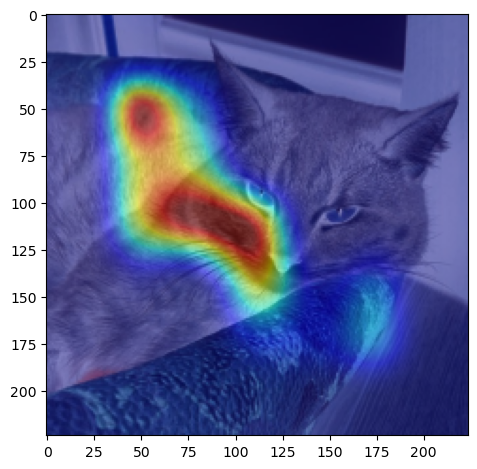

In [28]:
activation_map = cam(out.squeeze(0).argmax().item(), out)
result = overlay_mask(to_pil_image(input), to_pil_image(activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.tight_layout(); plt.show()